In [1]:
import os
path_pipest = os.path.abspath('./')
n=0
while (not os.path.basename(path_pipest)=='pipest') and (n<6):
    path_pipest=os.path.dirname(path_pipest)
    n+=1 
if not os.path.basename(path_pipest)=='pipest':
    raise ValueError("path_pipest not found. Instead: {}".format(path_pipest))
path_sdhawkes=path_pipest+'/sdhawkes_powerlaw'
path_lobster=path_pipest+'/lobster_for_sdhawkes'
path_lobster_data=path_lobster+'/data'
path_lobster_pyscripts=path_lobster+'/py_scripts'
path_models=path_pipest+'/models'
path_tests=path_pipest+'/tests'
path_saved_tests=path_tests+'/saved_tests'

In [2]:
import time
import sys
sys.path.append(path_sdhawkes+'/resources/')
sys.path.append(path_sdhawkes+'/modelling/')
sys.path.append(path_lobster_pyscripts+'/')

In [3]:
import pickle
import numpy as np
import pandas as pd

In [4]:
import model as sd_hawkes_model
import lob_model
import computation
import simulation
import goodness_of_fit
import mle_estimation as mle_estim
import uncertainty_quant

openmp.omp_get_max_threads(): 4
openmp.omp_get_max_threads(): 4


In [5]:
symbol = "INTC"
date = "2019-01-23"
time_window = "34200-37800"

In [6]:
# with open(path_models+'/{}/{}_{}/{}_sdhawkes_{}_{}'.format(symbol, symbol, date,symbol, date, time_window),'rb') as source:
#         model=pickle.load(source)
try:
    with open(path_models+'/{}/{}_sdhawkes_{}_{}_uq'.format(symbol, symbol, date, time_window),'rb') as source:
        model=pickle.load(source)
except:
    with open(path_models+'/{}/{}_{}_{}/{}_sdhawkes_{}_{}'.format(symbol, symbol, date, time_window, symbol, date, time_window),'rb') as source:
        model=pickle.load(source)
print(model.name_of_model)
print('Date and time of initilisation: {}'.format(model.datetime_of_initialisation))
print('number_of_event_types: {}; number_of_states: {}'.format(
    model.number_of_event_types, model.number_of_states))
print('Dimension of dataset: {}'.format((model.data.messagefile.shape)))

INTC_sdhawkes_2019-01-23_34200-37800_uq
Date and time of initilisation: 2020-04-24 18:37:24.418762
number_of_event_types: 4; number_of_states: 15
Dimension of dataset: (163422, 10)


In [7]:
print(model.uncertainty_quantification.base_rates)
print(model.uncertainty_quantification.mle_estim.base_rates)

[ 1.23666085  1.18804458 24.10317264 24.0238531 ]
[0.21287538 0.69023924 0.28076151 1.01657585]


In [29]:
e=0
print(np.linalg.norm(
      model.uncertainty_quantification.impact_coefficients[:,:,e]
      - model.uncertainty_quantification.mle_estim.hawkes_kernel.alphas[:,:,e])/
      np.linalg.norm(model.uncertainty_quantification.impact_coefficients[:,:,e]))
print(model.uncertainty_quantification.impact_coefficients[:,:,e])
print(model.uncertainty_quantification.mle_estim.hawkes_kernel.alphas[:,:,e])

1.1154474439486213
[[9.45934857e-01 7.14837661e-01 3.94701597e-01 8.58182946e-01
  9.25707481e-01 1.06426870e+00 1.23995690e+00 1.18902326e+00
  9.85027209e-01 9.85990979e-01 9.41798696e-01 9.41798696e-01
  9.37472365e-01 9.41798696e-01 9.41798696e-01]
 [1.29154816e-02 1.00000000e-07 1.00000000e-07 1.00000000e-07
  1.00000000e-07 1.00000000e-07 1.00000000e-07 1.00000000e-07
  1.00000000e-07 1.00000000e-07 2.48807371e-02 1.00000000e-07
  1.00000000e-07 1.00000000e-07 1.00000000e-07]
 [1.00000000e-07 1.00000000e-07 1.00000000e-07 1.00000000e-07
  1.00000000e-07 1.00000000e-07 1.00000000e-07 1.00000000e-07
  1.00000000e-07 1.00000000e-07 1.00000000e-07 1.00000000e-07
  1.00000000e-07 1.00000000e-07 1.00000000e-07]
 [1.00000000e-07 1.00000000e-07 1.00000000e-07 1.00000000e-07
  1.00000000e-07 2.66001432e-01 1.00000000e-07 1.00000000e-07
  1.00000000e-07 1.00000000e-07 1.41826840e-01 1.94016507e-01
  1.00000000e-07 1.00000000e-07 1.00000000e-07]]
[[4.78099685e-01 3.48870391e-01 2.78030797e-

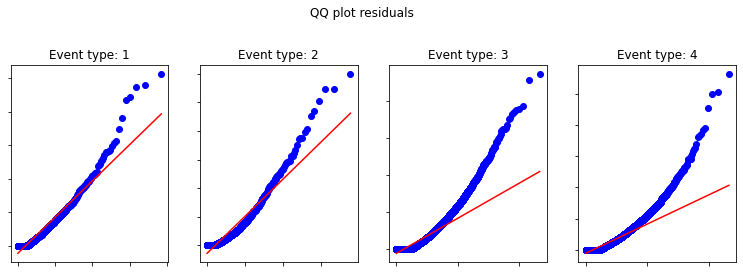

Anderson-Darling test to check distribution of residuals
Null hypothesis is "expon" 
Significance levels: [15.  10.   5.   2.5  1. ]
Critical values: [0.922 1.078 1.34  1.605 1.956]
event type=0, ad_stat: 1320.3176381252088
event type=1, ad_stat: 912.0205202450115
event type=2, ad_stat: 151284.17576564907
event type=3, ad_stat: 129963.42843636239
None


In [9]:
model.goodness_of_fit.qq_plot_residuals(index_of_first_event_type=1)
print(model.goodness_of_fit.ad_test_on_residuals())

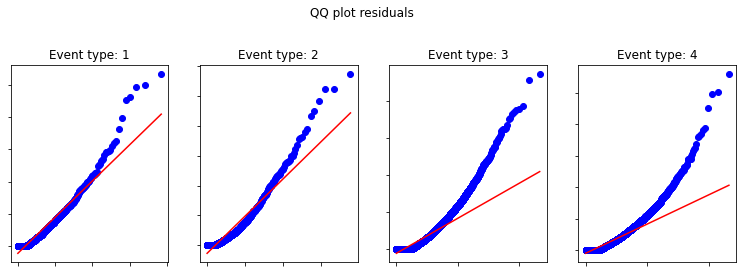

Anderson-Darling test to check distribution of residuals
Null hypothesis is "expon" 
Significance levels: [15.  10.   5.   2.5  1. ]
Critical values: [0.922 1.078 1.34  1.605 1.956]
event type=0, ad_stat: 1328.1008292856823
event type=1, ad_stat: 905.6648018854276
event type=2, ad_stat: 151363.54962753976
event type=3, ad_stat: 129893.23027136465
None


In [10]:
model.mle_estim.goodness_of_fit.qq_plot_residuals(index_of_first_event_type=1)
print(model.mle_estim.goodness_of_fit.ad_test_on_residuals())

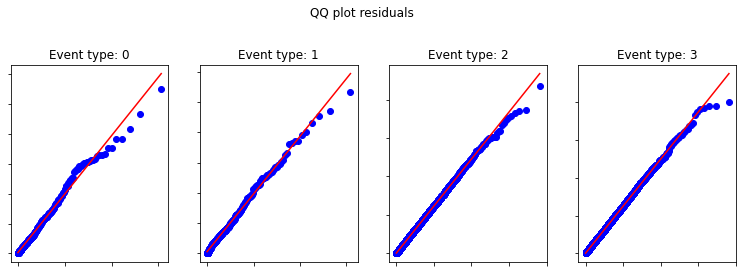

Anderson-Darling test to check distribution of residuals
Null hypothesis is "expon" 
Significance levels: [15.  10.   5.   2.5  1. ]
Critical values: [0.92  1.076 1.338 1.603 1.953]
event type=0, ad_stat: 0.3469197552502692
event type=1, ad_stat: 1.0227958591644892
event type=2, ad_stat: 0.450157246681556
event type=3, ad_stat: 0.3877520941769035
None


In [30]:
model.uncertainty_quantification.goodness_of_fit.qq_plot_residuals()
print(model.uncertainty_quantification.goodness_of_fit.ad_test_on_residuals())

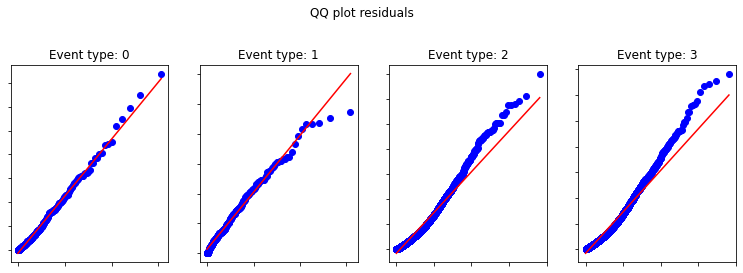

Anderson-Darling test to check distribution of residuals
Null hypothesis is "expon" 
Significance levels: [15.  10.   5.   2.5  1. ]
Critical values: [0.92  1.076 1.338 1.603 1.953]
event type=0, ad_stat: 2.3152098556332703
event type=1, ad_stat: 2.0259550393852237
event type=2, ad_stat: 178.4031247988387
event type=3, ad_stat: 168.62821299849202
None


In [26]:
model.uncertainty_quantification.mle_estim.goodness_of_fit.qq_plot_residuals()
print(model.uncertainty_quantification.mle_estim.goodness_of_fit.ad_test_on_residuals())

In [11]:
# model.nonparam_estim.goodness_of_fit.qq_plot_residuals(index_of_first_event_type=1)
# print(model.nonparam_estim.goodness_of_fit.ad_test_on_residuals())

In [12]:
# minim=model.mle_estim.results_of_estimation[3].get("MinimisationProcedure")
# minim.results

In [13]:
print(model.base_rates)
print(model.mle_estim.base_rates)

[ 1.23666085  1.18804458 24.10317264 24.0238531 ]
[ 1.28831563  1.13638979 24.18744966 23.93957608]


In [14]:
rho_max=0.0
for x in range(model.number_of_states):
    vals=(np.linalg.eigvals(model.impact_decay_ratios[:,x,:]))
    rho_max=max(rho_max,np.abs(np.amax(vals)))
#     print(model.impact_decay_ratios[:,x,:])
    print("x={}, max_L1norm={}, rho={}".format(x,np.amax(model.impact_decay_ratios[:,x,:]),np.amax(vals)))
print("rho_max={}".format(rho_max))    

x=0, max_L1norm=0.5646068964163445, rho=0.5646081945174901
x=1, max_L1norm=0.5651909594381354, rho=0.5653367757118868
x=2, max_L1norm=0.5672819433909218, rho=0.5672819456436972
x=3, max_L1norm=0.5695513689206313, rho=0.5695513724971248
x=4, max_L1norm=0.5653527137616774, rho=0.565748724268216
x=5, max_L1norm=0.574521041299349, rho=0.5745210413004774
x=6, max_L1norm=0.5796357136290617, rho=0.5796357136290753
x=7, max_L1norm=0.5282643767122369, rho=0.5282643767598605
x=8, max_L1norm=0.5678866461679253, rho=0.5678866461687511
x=9, max_L1norm=0.5698892333103912, rho=0.5698892333118124
x=10, max_L1norm=0.564464210532359, rho=0.5644642105338082
x=11, max_L1norm=0.5644647740031333, rho=0.5644648191186894
x=12, max_L1norm=0.5644984242488135, rho=0.5644984268791627
x=13, max_L1norm=0.5644807179890808, rho=0.5644809736247787
x=14, max_L1norm=0.564472382997573, rho=0.5644723830271563
rho_max=0.5796357136290753


In [15]:
# model.mle_estim.dirichlet_param

In [16]:
# model.impact_coefficients

In [17]:
e1=1
e=0
model.decay_coefficients[e1,:,e]

array([2.43606064, 2.43607518, 2.43607518, 2.43607518, 2.43607518,
       2.43607744, 2.43608264, 2.4360754 , 2.43607536, 2.43607522,
       2.43694569, 2.43607528, 2.43607543, 2.43607524, 2.43607551])

In [18]:
model.impact_decay_ratios[e1,:,e]

array([8.99368815e-03, 6.96342374e-08, 6.96342374e-08, 6.96342374e-08,
       6.96342374e-08, 6.96341277e-08, 6.96338756e-08, 6.96342268e-08,
       6.96342288e-08, 6.96342353e-08, 1.73150156e-02, 6.96342327e-08,
       6.96342252e-08, 6.96342347e-08, 6.96342216e-08])

In [19]:
np.amin(model.decay_coefficients)

1.0099936715030053

In [20]:
e=3
print(np.amax(model.impact_decay_ratios[:,:,e]))
print(np.amin(model.impact_decay_ratios[:,:,e]))
print(np.mean(model.impact_decay_ratios[:,:,e]))

0.5796357136290617
1.8211859589088677e-08
0.13808607558742472


In [21]:
x=2
np.linalg.eigvals(model.impact_decay_ratios[:,x,:])

array([9.40315016e-02, 5.47167358e-05, 5.67281946e-01, 5.50402970e-01])

In [22]:
model.inflationary_pressure

array([ 8.71137885,  4.82331931,  5.54432598,  3.64779231, 12.02709647,
        0.81317134,  0.65185086,  1.4245265 ,  1.99804961,  3.59647411,
        0.51284155,  2.23923885,  5.65133952,  5.61353183, 18.56616847])

In [23]:
model.deflationary_pressure

array([ 6.90615297,  3.93868859,  3.99244727,  1.48501337,  1.01862636,
        4.0848644 ,  3.50171352,  2.50297747,  1.68594076,  0.83286079,
        4.86259009,  4.03538511,  4.83465306,  6.69908937, 18.83232303])

In [24]:
model.impact_coefficients

array([[[9.45934857e-01, 3.47714333e-02, 1.00000000e-07, 1.00000000e-07],
        [7.14837661e-01, 1.00000000e-07, 1.00000000e-07, 1.00000000e-07],
        [3.94701597e-01, 1.00000000e-07, 1.00000000e-07, 1.00000000e-07],
        [8.58182946e-01, 1.00000000e-07, 1.00000000e-07, 1.00000000e-07],
        [9.25707481e-01, 2.96405559e-02, 1.00000000e-07, 1.00000000e-07],
        [1.06426870e+00, 1.00000000e-07, 1.00000000e-07, 1.00000000e-07],
        [1.23995690e+00, 1.00000000e-07, 1.00000000e-07, 1.00000000e-07],
        [1.18902326e+00, 1.00000000e-07, 1.00000000e-07, 1.00000000e-07],
        [9.85027209e-01, 1.00000000e-07, 1.00000000e-07, 1.00000000e-07],
        [9.85990979e-01, 8.58604249e-03, 1.00000000e-07, 1.00000000e-07],
        [9.41798696e-01, 8.83031484e-06, 1.00000000e-07, 1.00000000e-07],
        [9.41798696e-01, 1.00000000e-07, 1.39703031e-04, 1.00000000e-07],
        [9.37472365e-01, 1.00000000e-07, 1.00000000e-07, 1.00000000e-07],
        [9.41798696e-01, 1.00000000e-0

In [25]:
model.transition_probabilities

array([[[6.66666667e-02, 6.66666667e-02, 6.66666667e-02, 6.66666667e-02,
         6.66666667e-02, 6.66666667e-02, 6.66666667e-02, 6.66666667e-02,
         6.66666667e-02, 6.66666667e-02, 6.66666667e-02, 6.66666667e-02,
         6.66666667e-02, 6.66666667e-02, 6.66666667e-02],
        [6.66666667e-02, 6.66666667e-02, 6.66666667e-02, 6.66666667e-02,
         6.66666667e-02, 6.66666667e-02, 6.66666667e-02, 6.66666667e-02,
         6.66666667e-02, 6.66666667e-02, 6.66666667e-02, 6.66666667e-02,
         6.66666667e-02, 6.66666667e-02, 6.66666667e-02],
        [0.00000000e+00, 1.42857143e-01, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 8.57142857e-01, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 6.00000000e-01, 2.00000000e-01, 0.00000000e+00,
         0.00000000e+00